In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
#checking for type of the data
df.info()
# information of df -- columns, datatypes etc., Null values present in df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Basic Stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Treating missing values in Age and Embarked. Dropping cabin due to extremely high missing values
imputer = SimpleImputer(strategy='most_frequent')
df['Age']=imputer.fit_transform(df['Age'].values.reshape(-1,1))[:,0]
df['Embarked']=imputer.fit_transform(df['Embarked'].values.reshape(-1,1))[:,0]

In [7]:
df = df.drop(['Cabin'], axis=1)

In [8]:
# Results of imputation and drop
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


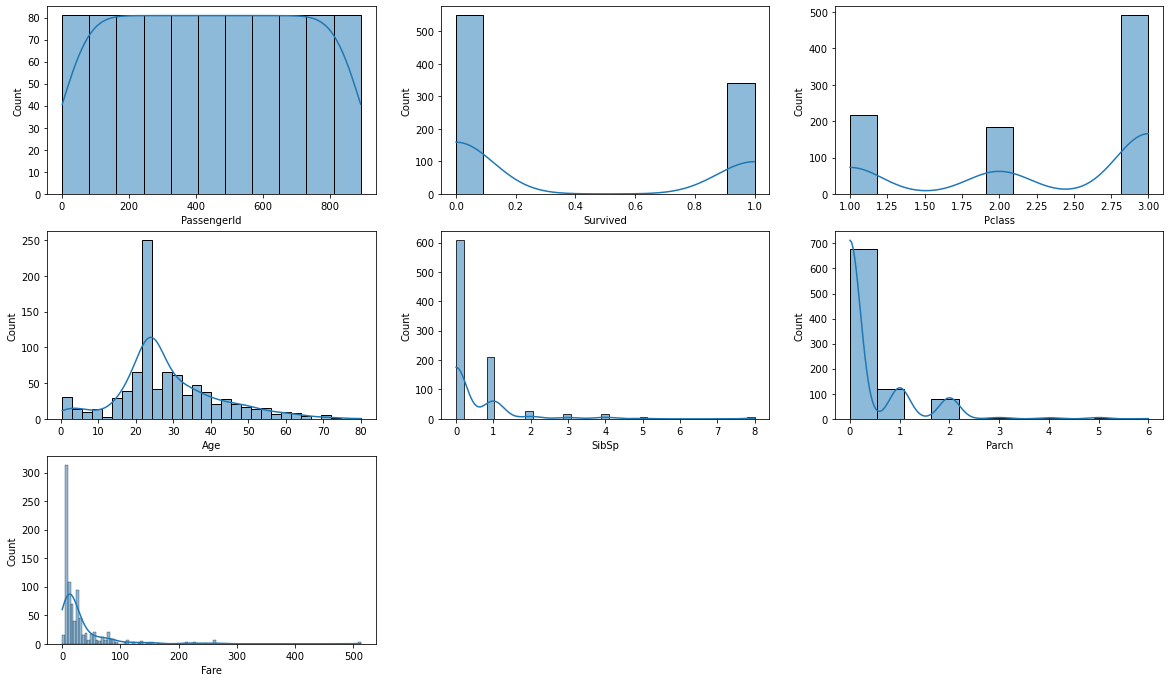

In [9]:
#Distribution, skew etc. of numerical columns
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
n_cols=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
for i in n_cols:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(x=df[i],data=df,kde=True)
    plotnumber+=1

 - label imbalance
 - signs of outliers
 - signs of skew

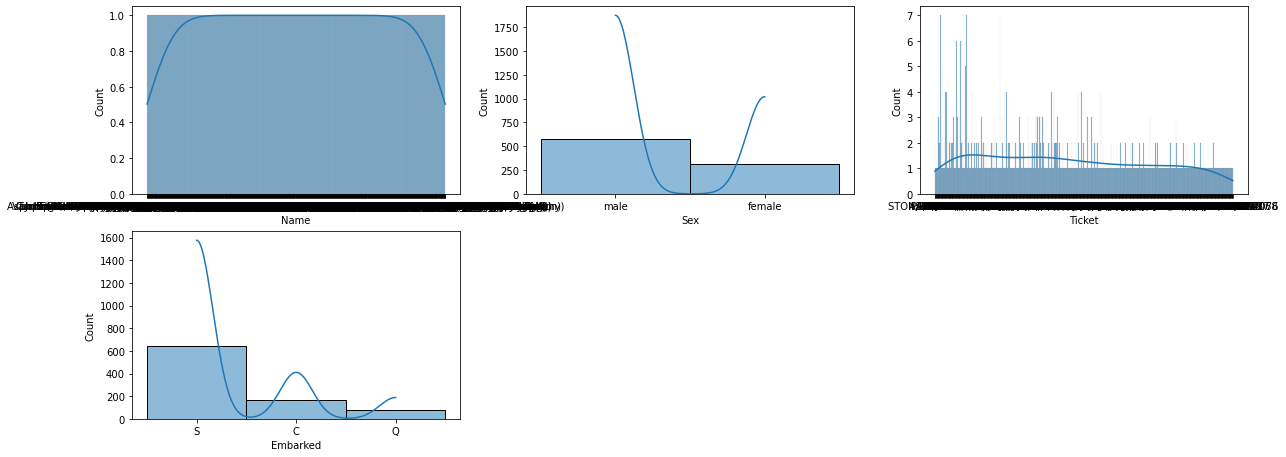

In [10]:
#Distribution, skew etc. of non-numerical columns
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
n_cols=['Name','Sex','Ticket','Embarked']
for i in n_cols:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(x=df[i],data=df,kde=True)
    plotnumber+=1

In [11]:
# Dropping index passengerid and name --This has nothing to do with survival
# Tickets also dropped due to high and inconsistent variations
df = df.drop(['PassengerId','Name','Ticket'], axis=1)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
# Encoding non-numerical columns as numeric columns
le=LabelEncoder()
list=['Sex','Embarked']
for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [14]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


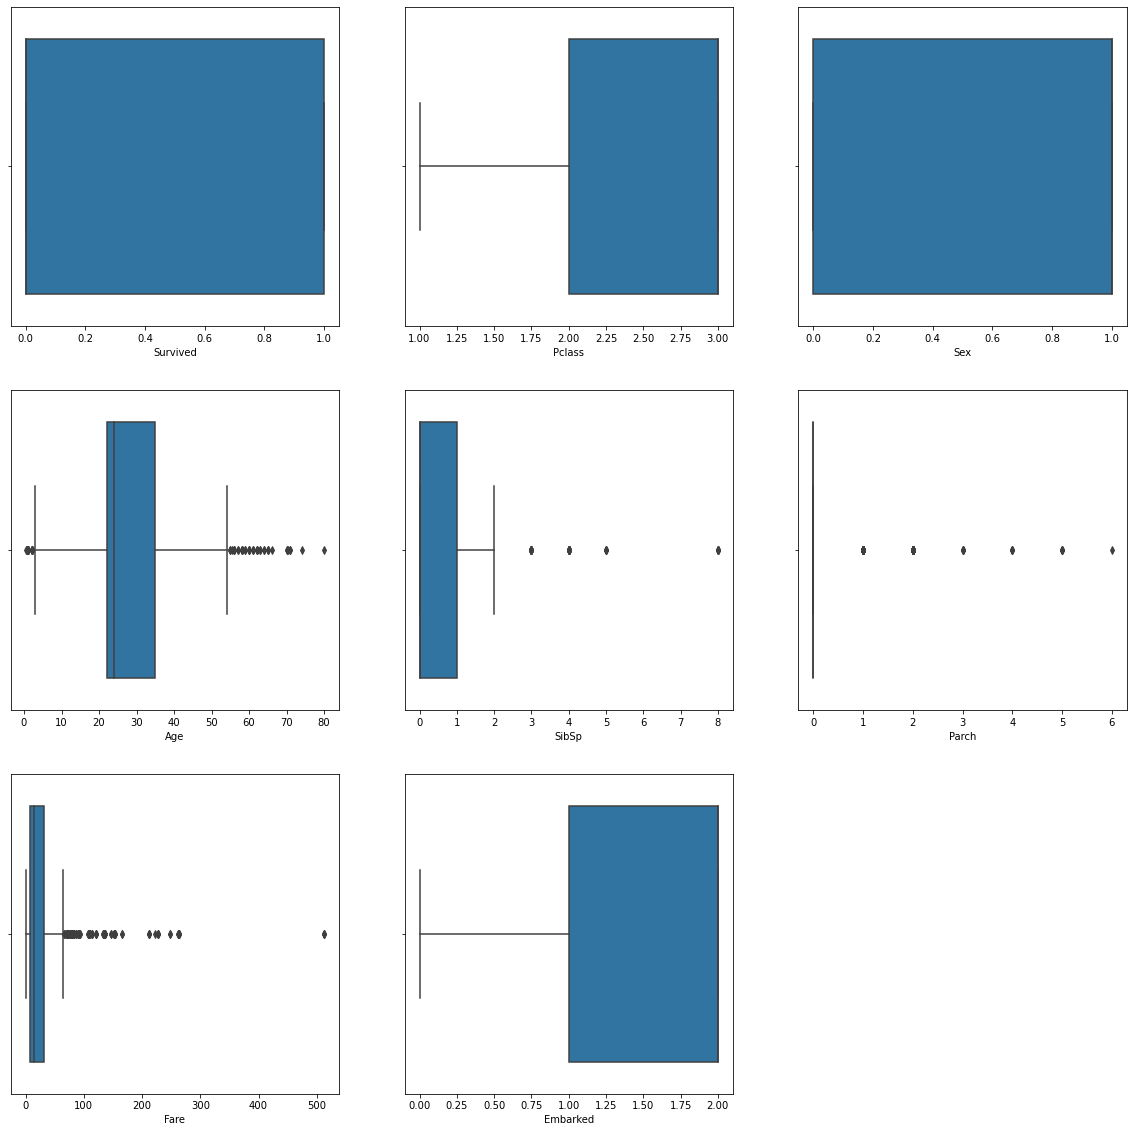

In [15]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
        if plotnumber<=9:
            ax=plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column)
        plotnumber+=1

 - Outliers detected. Need to remove outliers

In [16]:
z=np.abs(stats.zscore(df))
print(z)

[[0.78927234 0.82737724 0.73769513 ... 0.47367361 0.50244517 0.58595414]
 [1.2669898  1.56610693 1.35557354 ... 0.47367361 0.78684529 1.9423032 ]
 [1.2669898  0.82737724 1.35557354 ... 0.47367361 0.48885426 0.58595414]
 ...
 [0.78927234 0.82737724 1.35557354 ... 2.00893337 0.17626324 0.58595414]
 [1.2669898  1.56610693 0.73769513 ... 0.47367361 0.04438104 1.9423032 ]
 [0.78927234 0.82737724 0.73769513 ... 0.47367361 0.49237783 0.67817453]]


In [17]:
#Rows and columns with more than 3 outliers
np.where(z>3) 

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885]),
 array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
        6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
        5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
        4, 4, 3, 5, 4, 5]))

In [18]:
df.shape

(891, 8)

In [19]:
index=(np.where(z>3)[0])
df=df.drop(df.index[index])
df.shape

(820, 8)

In [20]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.564753
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [21]:
#features and labels
data=df.drop(columns='Survived')
labels=df['Survived']

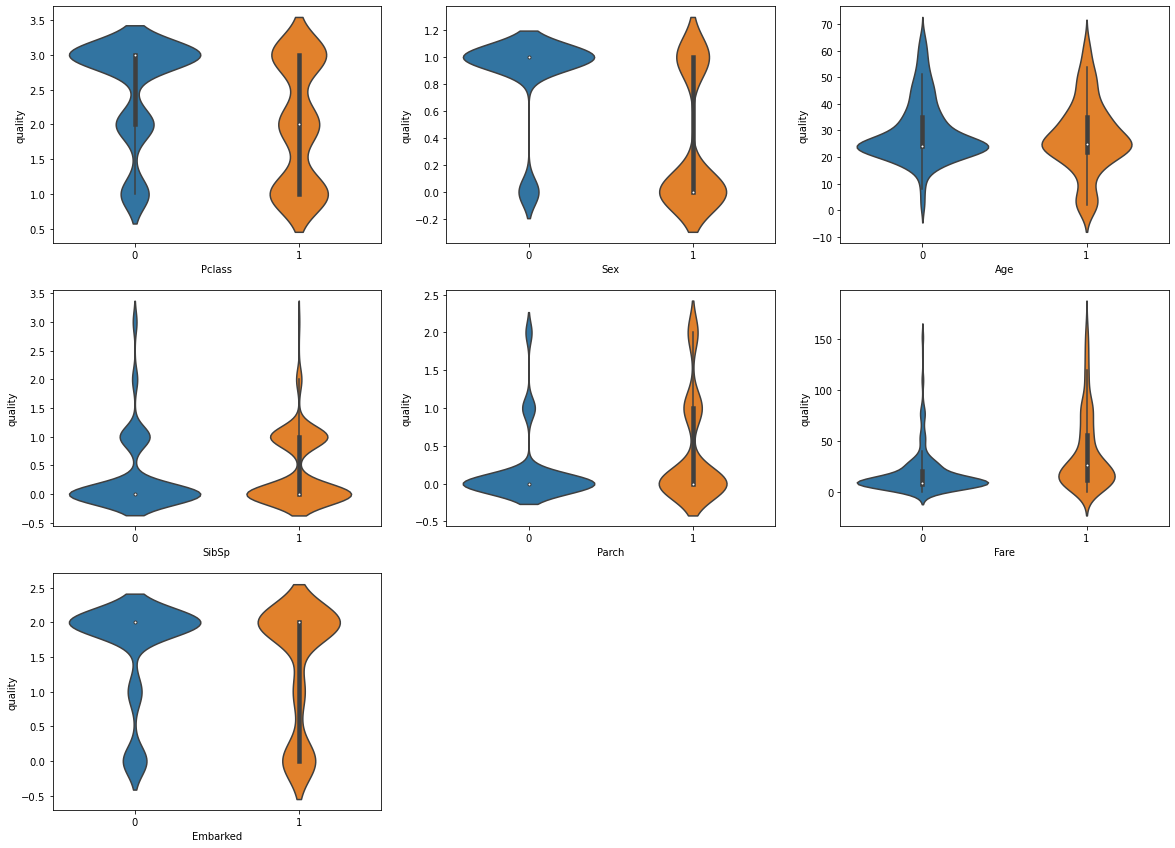

In [22]:
#Data and labels relation
plt.figure(figsize=(20,20))
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.violinplot(labels,data[i])
        plt.xlabel(i)
        plt.ylabel('quality')
    plotnumber+=1

In [23]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_new = power.fit_transform(data)

In [24]:
data_new=pd.DataFrame(data_new,columns=data.columns)
data_new.skew()

Pclass     -0.429718
Sex        -0.664152
Age         0.092760
SibSp       0.948944
Parch       1.581505
Fare       -0.018602
Embarked   -1.073724
dtype: float64

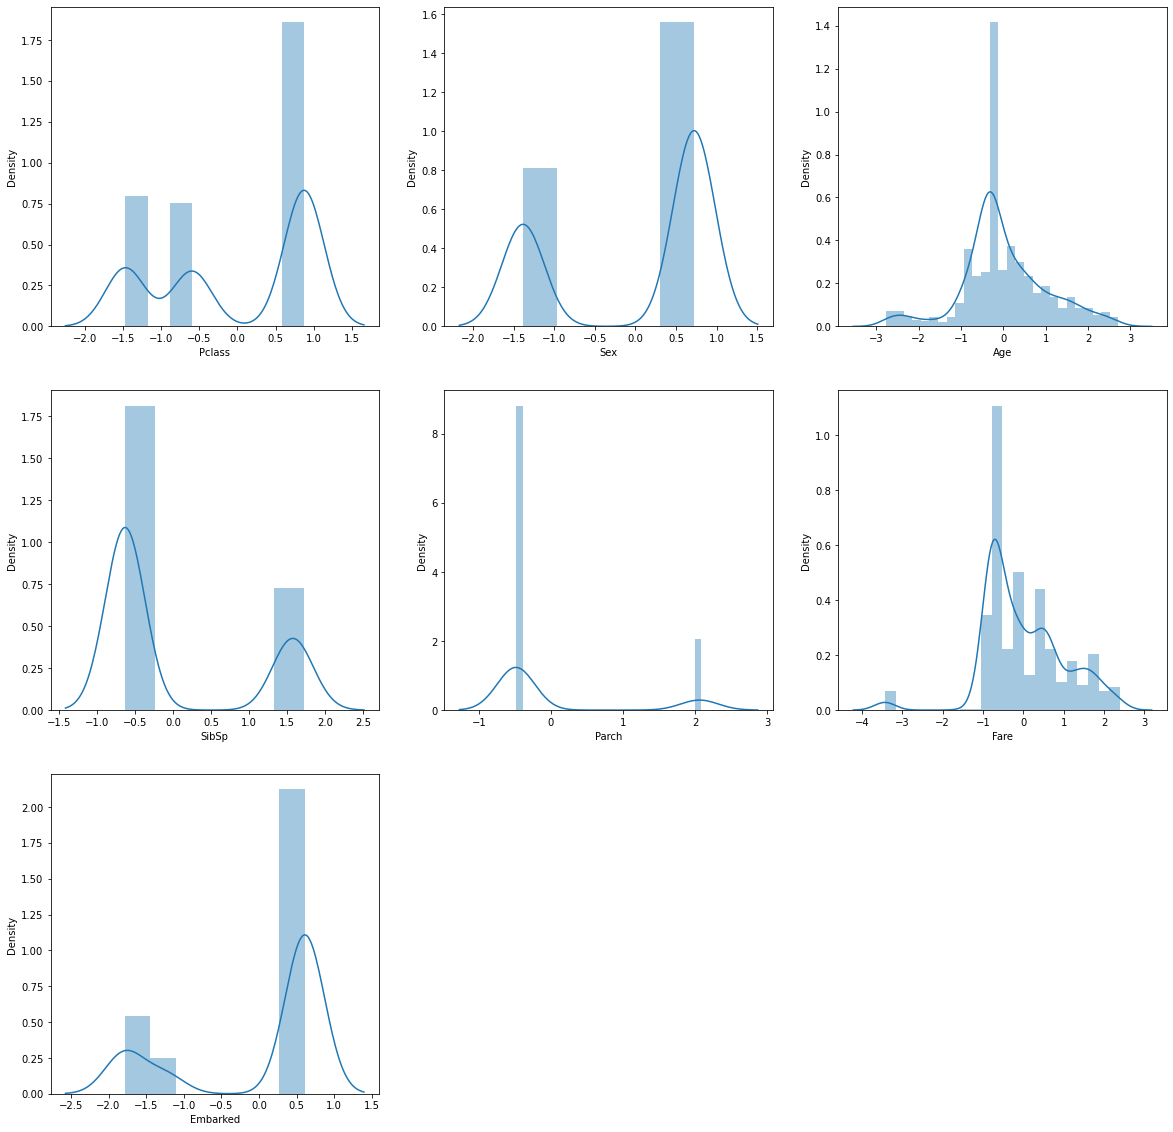

In [25]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in data_new:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_new[i])
        plt.xlabel(i)
    plotnumber+=1

In [26]:
data = data_new
scaler=StandardScaler()
data=scaler.fit_transform(data)

### Model

In [27]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gnb = GaussianNB()
svc = SVC()
xgbc = XGBClassifier()

m_list= [dtc,rfc,abc,gnb,svc,xgbc]

In [28]:
labels.value_counts()

0    500
1    320
Name: Survived, dtype: int64

In [29]:
# Balancing Dataset
smote = SMOTE(sampling_strategy='minority')
data, labels = smote.fit_resample(data, labels)
labels.value_counts()

0    500
1    500
Name: Survived, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

In [42]:
for m in m_list:
    m.fit(X_train,y_train)
    train_preds = m.predict(X_train)
    test_preds = m.predict(X_test)
    train_acc = accuracy_score(y_train,train_preds)*100
    test_acc = accuracy_score(y_test,test_preds)*100
    print(m)
    print('Training Accuracy: ',train_acc)
    print('Testing Accuracy: ',test_acc)
    print('cross validation scores below:--  \n',m)
    scr=cross_val_score(m,data,labels,cv=5)
    print('Cross validation score : ',scr.mean()*100)
    print('difference between model score and cross validation score: ',(test_acc - scr.mean()*100))
    print('\n')
    print('\n')

DecisionTreeClassifier()
Training Accuracy:  98.4
Testing Accuracy:  78.4
cross validation scores below:--  
 DecisionTreeClassifier()
Cross validation score :  79.2
difference between model score and cross validation score:  -0.7999999999999972




RandomForestClassifier()
Training Accuracy:  98.4
Testing Accuracy:  82.39999999999999
cross validation scores below:--  
 RandomForestClassifier()
Cross validation score :  81.3
difference between model score and cross validation score:  1.0999999999999943




AdaBoostClassifier()
Training Accuracy:  82.13333333333334
Testing Accuracy:  80.0
cross validation scores below:--  
 AdaBoostClassifier()
Cross validation score :  79.89999999999999
difference between model score and cross validation score:  0.10000000000000853




GaussianNB()
Training Accuracy:  76.0
Testing Accuracy:  76.4
cross validation scores below:--  
 GaussianNB()
Cross validation score :  75.9
difference between model score and cross validation score:  0.5




SVC()
Trai

 - SVC() and GaussianNB() shows least difference between model score and cross validation score.
 - Choosing SVC because of higher accuracy scores  

### HPT

In [49]:
# parameter grid
grid_param = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale','auto'],
    'decision_function_shape' : ['ovo','ovr']
}

In [50]:
# HPT using GridSearchCV
grid_search=GridSearchCV(SVC(random_state=42),param_grid=grid_param,cv=5,n_jobs=-1,verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [51]:
# Best parameters
grid_search.best_params_

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}

In [53]:
# Fitting model with best params
m = SVC(random_state=42,decision_function_shape='ovo',gamma='scale',kernel='poly')
m.fit(X_train,y_train)
train_preds = m.predict(X_train)
test_preds = m.predict(X_test)
train_acc = accuracy_score(y_train,train_preds)*100
test_acc = accuracy_score(y_test,test_preds)*100
print(m)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

SVC(decision_function_shape='ovo', kernel='poly', random_state=42)
Training Accuracy:  83.06666666666666
Testing Accuracy:  80.0


### Model Saving

In [54]:
import joblib

joblib.dump(m,'Titanic_SVC.obj')

['Titanic_SVC.obj']

In [55]:
joblib.load('Titanic_SVC.obj')

SVC(decision_function_shape='ovo', kernel='poly', random_state=42)